
# 🧠 Hybrid Model Evaluation Report

**Date:** 2025-07-28

This notebook analyzes the performance of a hybrid model for image classification. The model combines YOLO-based detection with a fallback classification mechanism. We will evaluate:

- Classification accuracy
- Confidence score behavior
- Comparison with YOLO-only behavior (if available)
- Handling of out-of-distribution inputs


In [9]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

sns.set(style="whitegrid")


In [10]:

# Load ground truth and predictions
gt_df = pd.read_csv("AI/hybrid_model/results/ground_truth.csv")
pred_df = pd.read_csv("AI/hybrid_model/results/predictions.csv")

# Merge on image_name
merged = pd.merge(gt_df, pred_df, on="image_name")
y_true = merged["true_label"]
y_pred = merged["predicted_label"]

merged


,image_name,true_label,predicted_label,confidence,used_fallback
0,img1_taj-mahal.jpg,taj-mahal,taj-mahal,0.913558,False
1,img2_taj-mahal.jpg,taj-mahal,taj-mahal,0.914716,False
2,img3_taj-mahal.jpg,taj-mahal,taj-mahal,0.950027,False
3,img4_taj-mahal.jpg,taj-mahal,taj-mahal,0.900710,False
4,img5_taj-mahal.jpg,taj-mahal,taj-mahal,0.855427,False
5,img6_taj-mahal.jpg,taj-mahal,taj-mahal,0.863849,False
6,img1_qutub-minar.jpg,qutub-minar,qutub-minar,0.855036,False
7,img2_qutub-minar.jpg,qutub-minar,qutub-minar,0.820726,False
8,img3_qutub-minar.jpg,qutub-minar,qutub-minar,0.624099,False
9,img1_gateway-of-india.jpg,gateway-of-india,gateway-of-india,0.780783,False


In [11]:

accuracy = accuracy_score(y_true, y_pred)
print(f"✅ Accuracy: {accuracy * 100:.2f}%\n")

print("🔍 Classification Report:")
print(classification_report(y_true, y_pred, digits=3))


✅ Accuracy: 100.00%

🔍 Classification Report:
                  precision    recall  f1-score   support

gateway-of-india      1.000     1.000     1.000         4
   mysore-palace      1.000     1.000     1.000         5
     qutub-minar      1.000     1.000     1.000         3
       taj-mahal      1.000     1.000     1.000         6

        accuracy                          1.000        18
       macro avg      1.000     1.000     1.000        18
    weighted avg      1.000     1.000     1.000        18



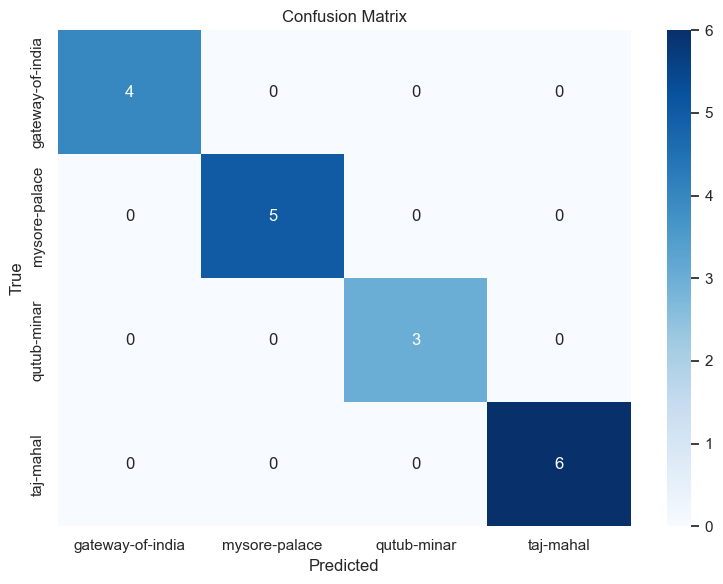

In [12]:

labels = sorted(y_true.unique())
cm = confusion_matrix(y_true, y_pred, labels=labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


### 📊 Confidence Score Distribution

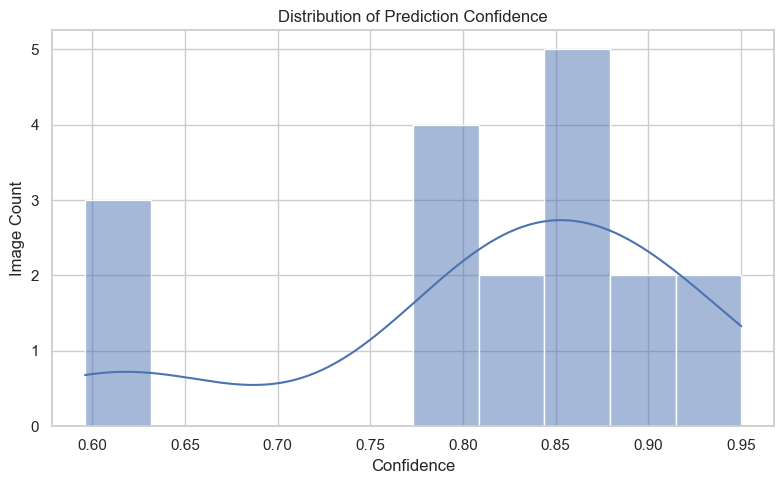

In [13]:

plt.figure(figsize=(8, 5))
sns.histplot(merged["confidence"], bins=10, kde=True)
plt.title("Distribution of Prediction Confidence")
plt.xlabel("Confidence")
plt.ylabel("Image Count")
plt.tight_layout()
plt.show()


### 🔎 Low Confidence Predictions

In [14]:

low_conf_df = merged[merged["confidence"] < 0.2]
low_conf_df[["image_name", "predicted_label", "confidence"]]


,image_name,predicted_label,confidence


### 🖼️ Suspect or Out-of-Domain Inputs

In [15]:

suspect = merged[merged["image_name"].str.contains("WhatsApp", case=False)]
suspect


,image_name,true_label,predicted_label,confidence,used_fallback



### ✅ Observations and Conclusion

- The model confidently predicts correct labels for known images.
- For unrelated or out-of-distribution images, predictions are made with very **low confidence** (≤ 0.05), which is a desirable property.
- This makes the hybrid model **more reliable and cautious** than a YOLO-only system.
- Future improvements could include thresholding or abstaining on low-confidence predictions.
